<a href="https://colab.research.google.com/github/Daria9519/Diff_code_examples/blob/master/Sber_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загружаем библиотеки и получаем доступ к google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout, Lambda
from keras.preprocessing import text, sequence
import os
import gc
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter
from contextlib import contextmanager
import time
from functools import partial
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold
import torch
from pathlib import Path
import lightgbm as lgb
#import warnings
#warnings.filterwarnings("ignore")

#**Загрузка данных**

In [3]:
train_path = '/content/drive/My Drive/Univer/Hackaton/train.csv'
test_path = '/content/drive/My Drive/Univer/Hackaton/test.csv'

In [4]:
train_df = pd.read_csv(train_path, sep = ',')
test_df1 = pd.read_csv(test_path, sep = ',')

**Описание данных**

**installment** - Ежемесячный платеж, который клиенту необходимо будет платить при одобрении кредита

**dti** - Коэфффициент, рассчитываемый как отношение общих ежемесячных выплат по долгу заемщика к общей сумме долговых обязательств, исключая ипотеку и запрошенную ссуду, деленное на ежемесячный доход заемщика (по информации от заемщика)

**funded_amnt** - Общая сумма кредита

**annual_inc** - Годовой доход, сообщаемый заемщиком

**emp_length** - Стаж на работе в годах. Возможные значения от 0 до 10, где 0 означает менее одного года, а 10 означает десять или более лет.

**term** -  Количество выплат по кредиту. Значения указаны в месяцах и могут быть 36 или 60.

**inq_last_6mths** - Количество запросов за кредитом за последние 6 месяцев (без учета авто и ипотеки)

**mths_since_recent_inq** - Количество месяцев с момента последнего запроса за кредитом

**delinq_2yrs** - Количество просроченных платежей на 30+ дней в кредитной истории заемщика за последние 2 года

**chargeoff_within_12_mths** - Количество списаний за 12 месяцев

**num_accts_ever_120_pd** - Количество кредитов с 120 или более дней просрочки

**num_tl_90g_dpd_24m** - Количество кредитов, просроченных на 90 или более дней за последние 24 месяца

**acc_open_past_24mths** - Количество сделок, открытых за последние 24 месяца

**avg_cur_bal** - Средний текущий баланс всех счетов

**tot_hi_cred_lim** - Общий высокий кредитный / кредитный лимит

**delinq_amnt** - Сумма просроченной задолженности по счетам, по которым заемщик в настоящее время просрочен.

**def** - Наличие дефолта у клиента (0 - не было дефолта, 1 - был дефолт)

**purpos**e - Цель кредита (закодировано методом one-hot encoding)

**sub_grade** - оценка кредитоспобоности клиента из внешних рейтингов (закодировано методом one-hot encoding)

**home_ownership** - Тип имущественного владения заёмщика (закодировано методом one-hot encoding)

**id** - идентификатор заёмщика

In [5]:
#Вызываем список столбцов в массиве и сверяем с описанием -> было найдено несколько ошибок, описание столбцов исправлено согласно массиву данных
train_df.columns

Index(['installment', 'dti', 'funded_amnt', 'annual_inc', 'emp_length', 'term',
       'inq_last_6mths', 'mths_since_recent_inq', 'delinq_2yrs',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd',
       'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal',
       'tot_hi_cred_lim', 'delinq_amnt', 'def', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'su

In [6]:
test_df = test_df1.drop(columns =['Unnamed: 0', 'id'])

In [7]:
test_df.columns

Index(['installment', 'dti', 'funded_amnt', 'annual_inc', 'emp_length', 'term',
       'inq_last_6mths', 'mths_since_recent_inq', 'delinq_2yrs',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd',
       'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal',
       'tot_hi_cred_lim', 'delinq_amnt', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade

In [8]:
test_df.shape

(30000, 69)

In [9]:
#Размерность
train_df.shape

(30000, 71)

In [10]:
#Запрашиваем тип данных массива с количеством столбцов
train_df.dtypes.value_counts()

float64    63
int64       8
dtype: int64

In [11]:
#удалить delinq_amnt, chargeoff_within_12_mths, emp_length

In [12]:
#Смотрим статистические показатели данных
train_df.describe()

,installment,dti,funded_amnt,annual_inc,emp_length,term,inq_last_6mths,mths_since_recent_inq,delinq_2yrs,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,acc_open_past_24mths,avg_cur_bal,tot_hi_cred_lim,delinq_amnt,def,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,id
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0000,30000.000000,30000.000000,30000.000000,30000.000000
mean,447.958396,17.464559,14676.759167,7.347708e+04,6.148960,42.323200,0.790133,6.975376,0.291967,0.007800,0.402689,0.078329,4.116033,13711.201617,1.678085e+05,15.830300,0.160733,0.008767,0.233867,0.602233,0.055700,0.004667,0.01640,0.007733,0.005533,0.045500,0.000433,0.010867,0.004433,0.003867,0.020233,0.020833,0.026133,0.036133,0.043833,0.051067,0.058533,0.073467,0.071033,0.052467,0.060433,0.056967,0.056967,0.055933,0.049900,0.041200,0.034600,0.029600,0.028967,0.024167,0.016667,0.017733,0.014700,0.013533,0.010767,0.008133,0.006467,0.006000,0.003533,0.003800,0.002033,0.001700,0.001233,0.000633,0.000600,0.524067,0.0001,0.000200,0.089100,0.386533,14999.500000
std,244.018921,7.711846,8242.287821,4.665237e+04,3.523382,10.572496,1.039611,5.561142,0.805984,0.095601,1.060760,0.401242,2.722024,15522.140740,1.607858e+05,865.538743,0.367291,0.093221,0.423295,0.489445,0.229345,0.068155,0.12701,0.087600,0.074182,0.208402,0.020812,0.103677,0.066437,0.062063,0.140800,0.142829,0.159534,0.186625,0.204728,0.220137,0.234753,0.260905,0.256885,0.222970,0.238292,0.231783,0.231783,0.229797,0.217742,0.198756,0.182767,0.169484,0.167716,0.153569,0.128021,0.131983,0.120351,0.115545,0.103204,0.089819,0.080156,0.077228,0.059338,0.061528,0.045047,0.041197,0.035098,0.025159,0.024488,0.499429,0.0100,0.014141,0.284893,0.486963,8660.398374
min,4.930000,0.000000,1000.000000,7.200000e+03,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,272.707500,11.670000,8325.000000,4.500000e+0

#**Анализ данных**

In [13]:
num_of_delinq_amnt	 = 0
for i in range(len(train_df)):
  if train_df['def'][i]==1 and train_df['purpose_credit_card'][i] ==1:
    num_of_delinq_amnt +=1
print('Из 4822 клиентов ипотека есть у {} клиентов'.format(num_of_delinq_amnt))

Из 4822 клиентов ипотека есть у 964 клиентов


In [14]:
#Рассчитываем количество клиентов, у которых случился дефолт
num = 0
for i in train_df['def']:
  if i == 1:
    num += 1
print('Из 30 000 клиентов дефолт случился у {} клиентов'.format(num))

Из 30 000 клиентов дефолт случился у 4822 клиентов


In [15]:
#Смотрим на статистику по ипотеке
num_m = 0
for i in train_df['home_ownership_MORTGAGE']:
  if i == 1:
    num_m += 1
print('Из 30 000 клиентов ипотека есть у {} клиентов'.format(num_m))

num_of_ownership_MORTGAGE = 0
for i in range(len(train_df)):
  if train_df['def'][i]==1 and train_df['home_ownership_MORTGAGE'][i] == 1:
    num_of_ownership_MORTGAGE +=1
print('Из 4822 клиентов ипотека есть у {} клиентов'.format(num_of_ownership_MORTGAGE))

Из 30 000 клиентов ипотека есть у 15722 клиентов
Из 4822 клиентов ипотека есть у 2282 клиентов


In [16]:
#Проверяем массив на наличие пропусков
null_columns={}
for i in train_df.columns:
    null_columns[i] = train_df[i].isnull().sum()

columns_with_null = 0
for key, value in null_columns.items():
  if value == 1:
    columns_with_null +=1
print('Количество столбцов с пустыми элементами в массиве: {}'.format(columns_with_null))

Количество столбцов с пустыми элементами в массиве: 0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


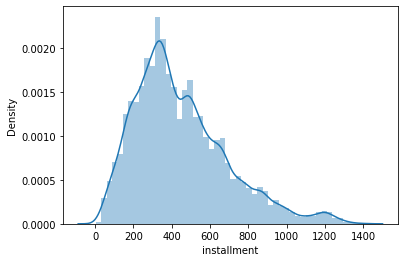

In [17]:
#График распределения выборки
%matplotlib inline
sns.distplot(train_df['installment'])

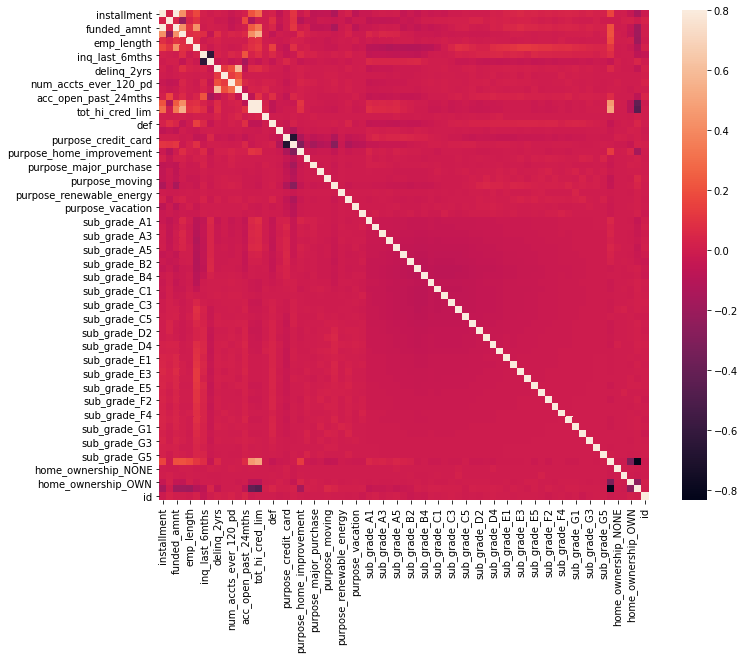

In [18]:
#Матрица корреляций переменных
correlation_matrix = train_df.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlation_matrix, vmax = .8, square = True)

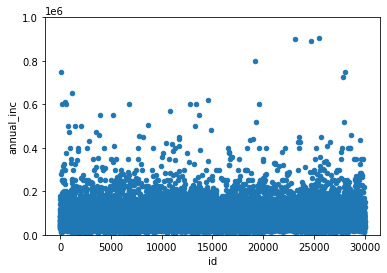

In [19]:
#График для просмотра выбросов в выборке
var1 = 'id'
var2 = 'annual_inc'
outlier = pd.concat([train_df[var2], train_df[var1]], axis = 1)
outlier.plot.scatter(x = var1, y = var2, ylim = (0,1000000))

#**Разбиваем датасет на тренировочный и тестовый и нормализуем**

In [20]:
X = train_df.drop(columns = ['id','def'])
Y = train_df[['def']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [22]:
def normalize_func(df):
  column_names_to_normalize = ['installment', 'dti', 'funded_amnt', 'annual_inc', 'emp_length', 'term',
       'inq_last_6mths', 'mths_since_recent_inq', 'delinq_2yrs',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd',
       'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal',
       'tot_hi_cred_lim', 'delinq_amnt']
  col_with_one_hot = ['purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding','sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT']
  df_with_norm_column = df[column_names_to_normalize]
  df_scaled = df_with_norm_column.copy()
  for column in df_scaled.columns:
      df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
  df_scaled_join = df_scaled.join(df[col_with_one_hot])
  return df_scaled_join


In [23]:
x_train_norm = normalize_func(x_train)
x_test_norm = normalize_func(x_test)

#Пробуем различные варианты решения

#**GradientBoosting**

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(x_train_norm, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_grad = clf.predict(x_test_norm)

In [ ]:
roc_auc_score(y_test,y_pred_grad)

0.5009032459160624

#**RandomForestClassifier**

In [ ]:
clf = RandomForestClassifier(n_jobs= -1, max_features=0.5, n_estimators=17, min_samples_split = 10)
clf = clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
predict_from_RF = clf.predict(x_test)

In [ ]:
roc_auc_score(y_test,predict_from_RF)

0.5133427590887493

In [ ]:
accuracy_score(y_test,predict_from_RF)

0.8263333333333334

#**CatBoost**

In [ ]:
!pip install catboost -U

In [ ]:
!git clone https://github.com/lmassaron/deep_learning_for_tabular_data.git

In [ ]:
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from catboost import CatBoostClassifier, Pool

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer

In [ ]:
x_train_cat = x_train.astype(int)
x_test_cat = x_test.astype(int)

In [ ]:
# Initializing a CatBoostClassifier with best parameters
best_params = {'bagging_temperature': 0.6,
               'border_count': 1,
               'depth': 1,
               'iterations': 4000,
               'l2_leaf_reg': 1,
               'learning_rate': 0.8846,
               'random_strength': 0.85,
               'scale_pos_weight': 0.60}

catb = CatBoostClassifier(**best_params,
                          loss_function='Logloss',
                          eval_metric = 'AUC',
                          nan_mode='Min',
                          thread_count=2)

In [ ]:
roc_auc = list()
average_precision = list()
oof = np.zeros(len(x_train_cat))
best_iteration = list()
categorical_variables = ['installment', 'dti', 'funded_amnt', 'annual_inc', 'emp_length', 'term', 
       'inq_last_6mths', 'mths_since_recent_inq', 'delinq_2yrs',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd',
       'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal',
       'tot_hi_cred_lim', 'delinq_amnt','purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding','sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT']

    
train = Pool(data=x_train_cat, 
          label=y_train,            
          feature_names=list(x_train_cat.columns),
          cat_features=categorical_variables)

test = Pool(data=x_test_cat, 
            label=y_test,
            feature_names=list(x_test_cat.columns),
            cat_features=categorical_variables)

catb.fit(train,
          verbose_eval=100, 
          early_stopping_rounds=150,
          eval_set=test,
          use_best_model=True,
          #task_type = "GPU",
          plot=False)

best_iteration.append(catb.best_iteration_)
pred_cat_cv = catb.predict_proba(x_test_cat)

roc_auc.append(roc_auc_score(y_true=y_test, y_score=pred_cat_cv[:,1]))
average_precision.append(average_precision_score(y_true=y_test, y_score=pred_cat_cv[:,1]))

0:	test: 0.5001000	best: 0.5001000 (0)	total: 26.8ms	remaining: 1m 47s
100:	test: 0.6832958	best: 0.6835543 (98)	total: 1.59s	remaining: 1m 1s
200:	test: 0.6832363	best: 0.6845349 (118)	total: 3.13s	remaining: 59.1s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.6845349035
bestIteration = 118

Shrink model to first 119 iterations.


In [ ]:
roc_auc_score(y_true=y_test, y_score=pred_cat_cv[:,1])

0.685788710567877

#**Tensorflow**

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            128, activation="relu", input_shape=(69,)
        ),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

In [ ]:
weight_for_0 = 1.0 / 3824
weight_for_1 = 1.0 / 20176

In [ ]:
num_val_samples = int(len(x_train_norm) * 0.2)
train_features = x_train_norm[:-num_val_samples]
train_targets = y_train[:-num_val_samples]
val_features = x_train_norm[-num_val_samples:]
val_targets = y_train[-num_val_samples:]

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

In [ ]:
metrics = keras.metrics.AUC(name="auc")

model.compile(
    optimizer=keras.optimizers.Adam(1e-6), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    x_train_norm,
    y_train,
    batch_size=16,
    epochs=1000,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

In [ ]:
y_keras_pred = model.predict(x_test_norm, batch_size = 16)

In [ ]:
roc_auc_score(y_test,y_keras_pred)

#**TabNet**

In [ ]:
!pip install pytorch-tabnet

In [25]:
from pytorch_tabnet.tab_model import TabNetRegressor 
from pytorch_tabnet.tab_model import TabNetClassifier

In [26]:
train = train_df.copy()
num_val_samples = int(len(train) * 0.2)
x_train_tabnet = train[:-num_val_samples]
x_train_tabnet1 = x_train_tabnet.drop(columns = ['id', 'def'])
#train_targets = y_train[:-num_val_samples]
x_test_tabnet = train[-num_val_samples:]
x_test_tabnet1 = x_test_tabnet.drop(columns = ['id', 'def'])
#val_targets = y_train[-num_val_samples:]

print("Number of training samples:", len(x_train_tabnet))
print("Number of validation samples:", len(x_test_tabnet))
print(x_train_tabnet1.shape)
print(x_test_tabnet1.shape)

Number of training samples: 24000
Number of validation samples: 6000
(24000, 69)
(6000, 69)


In [28]:
prediction_dict = {}
oof_dict = {}

target = x_train_tabnet['def']

cat_features = ['purpose_car',
                'purpose_credit_card', 'purpose_debt_consolidation',
                'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
                'purpose_medical', 'purpose_moving', 'purpose_other',
                'purpose_renewable_energy', 'purpose_small_business',
                'purpose_vacation', 'purpose_wedding','sub_grade_A1', 'sub_grade_A2',
                'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
                'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
                'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
                'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
                'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
                'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
                'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
                'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
                'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
    'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT']
num_features = ['installment', 'dti', 'funded_amnt', 'annual_inc', 'term',
       'inq_last_6mths', 'mths_since_recent_inq', 'delinq_2yrs', 'num_accts_ever_120_pd', 'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal', 'tot_hi_cred_lim']

features = num_features + cat_features
cat_idxs = [ i for i, f in enumerate(features) if f in cat_features]

        
clf = TabNetClassifier(
                    n_d = 64,
                    n_a = 64,
                    n_steps = 5,
                    gamma =0.9, 
                    n_independent =2,
                    n_shared =2,
                    epsilon  = 1e-15,
                    #momentum = 0.02,
                    #clip_value =None,
                    #lambda_sparse =1e-3,
                    optimizer_fn =torch.optim.Adam,
                    optimizer_params = dict(lr = 1e-4),
                    scheduler_params = {'step_size': 50, 'gamma': 0.9},
                    scheduler_fn = torch.optim.lr_scheduler.StepLR,
                    device_name = 'auto')

num_val_samples = int(len(x_train_norm) * 0.2)
X_train = x_train[:-num_val_samples]
X_train = X_train.values
print(X_train.shape)
y_train_tab = y_train['def'][:-num_val_samples]
y_train_tab = y_train_tab.values
#y_train = np.reshape(y_train, (19200,1))
print(y_train.shape)

X_valid = x_train[-num_val_samples:]
X_valid = X_valid.values
print(X_valid.shape)
y_valid = y_train['def'][-num_val_samples:]
y_valid = y_valid.values
#y_valid = np.reshape(y_valid, (4800,1))
print(y_valid.shape)

clf.fit(X_train=X_train, y_train=y_train_tab, 
        eval_set=[(X_train, y_train_tab), (X_valid, y_valid)],
        eval_name=['train', 'valid'],
        max_epochs=200,
        patience=20,
        batch_size=1024, virtual_batch_size=128,
        num_workers=0,
        weights=1,
        drop_last=False)

Device used : cpu
(19200, 69)
(24000, 1)
(4800, 69)
(4800,)
epoch 0  | loss: 1.66072 | train_auc: 0.51159 | valid_auc: 0.48453 |  0:00:17s
epoch 1  | loss: 1.59297 | train_auc: 0.51996 | valid_auc: 0.50432 |  0:00:35s
epoch 2  | loss: 1.49855 | train_auc: 0.49231 | valid_auc: 0.47244 |  0:00:52s
epoch 3  | loss: 1.3877  | train_auc: 0.50756 | valid_auc: 0.48988 |  0:01:10s
epoch 4  | loss: 1.30452 | train_auc: 0.50293 | valid_auc: 0.48613 |  0:01:27s
epoch 5  | loss: 1.22268 | train_auc: 0.50834 | valid_auc: 0.49214 |  0:01:50s
epoch 6  | loss: 1.18798 | train_auc: 0.49785 | valid_auc: 0.48712 |  0:02:08s
epoch 7  | loss: 1.1631  | train_auc: 0.50468 | valid_auc: 0.49246 |  0:02:25s
epoch 8  | loss: 1.12904 | train_auc: 0.51328 | valid_auc: 0.5015  |  0:02:43s
epoch 9  | loss: 1.10557 | train_auc: 0.51615 | valid_auc: 0.50976 |  0:03:00s
epoch 10 | loss: 1.07433 | train_auc: 0.52436 | valid_auc: 0.51193 |  0:03:18s
epoch 11 | loss: 1.06091 | train_auc: 0.52301 | valid_auc: 0.5185  |  0

In [29]:
x_test_tabnet_val = x_test_tabnet1.values

In [30]:
preds = clf.predict_proba(x_test_tabnet_val)

In [31]:
roc_auc_score(y_test, preds[:,1])

0.5078393492302478

#**Fast.ai**

In [ ]:
from fastai.tabular import *

In [ ]:
dep_var = 'def'
cat_names = ['purpose_car',
              'purpose_credit_card', 'purpose_debt_consolidation',
              'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
              'purpose_medical', 'purpose_moving', 'purpose_other',
              'purpose_renewable_energy', 'purpose_small_business',
              'purpose_vacation', 'purpose_wedding','sub_grade_A1', 'sub_grade_A2',
              'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
              'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
              'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
              'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
              'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
              'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
              'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
              'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
              'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
              'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT']
cont_names = ['installment', 'dti', 'funded_amnt', 'annual_inc', 'emp_length', 'term',
       'inq_last_6mths', 'mths_since_recent_inq', 'delinq_2yrs',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd',
       'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal',
       'tot_hi_cred_lim', 'delinq_amnt']
procs = [FillMissing, Categorify, Normalize]

In [ ]:
path = ''

tr_data = x_train_norm.join(y_train['def'])
test = TabularList.from_df(x_test_norm)

data = (TabularList.from_df(tr_data, path = path, cat_names = cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx=range(20000,24000))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

learn = tabular_learner(data, layers=[200,100], metrics= accuracy)
learn.fit(200, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.663424,0.644542,0.672250,00:09
1,0.563217,0.542896,0.790750,00:09
2,0.487298,0.472558,0.828000,00:09
3,0.436351,0.435854,0.835750,00:09
4,0.407676,0.422087,0.836250,00:09
5,0.408032,0.424872,0.837750,00:09
6,0.408953,0.426270,0.837500,00:09
7,0.400205,0.424449,0.837000,00:09
8,0.408167,0.425003,0.835750,00:09
9,0.404478,0.420400,0.837000,00:09


In [ ]:
test_data = x_test_norm.join(y_test['def'])
data_test = (TabularList.from_df(test_data, path=path, cat_names=cat_names,cont_names=cont_names, procs=procs)
                           .split_none()
                           .label_from_df(cols=dep_var))
data_test.valid = data_test.train
data_test=data_test.databunch()

learn.data.valid_dl = data_test.valid_dl
pred_fastai = learn.get_preds(ds_type=DatasetType.Valid)[0]

In [ ]:
roc_auc_score(y_test,pred_fastai[:,1])

0.5934353713424451

#**XGboost**

In [ ]:
import xgboost as xgb

In [ ]:
x_train_norm_b = x_train_norm.drop(columns = ['delinq_amnt', 'chargeoff_within_12_mths', 'emp_length'])
x_test_norm_b = x_test_norm.drop(columns = ['delinq_amnt', 'chargeoff_within_12_mths', 'emp_length'])

In [ ]:
train = x_train_norm_b.copy()
num_val_samples = int(len(x_train_norm_b) * 0.2)
x_train_xg = x_train_norm_b[:-num_val_samples]
y_ytain_xg = y_train[:-num_val_samples]
x_eval_xg = x_train_norm_b[-num_val_samples:]
y_eval_xg = y_train[-num_val_samples:]

In [ ]:
x_train_boost = xgb.DMatrix(x_train_xg , label=y_ytain_xg)
eval_boost = xgb.DMatrix(x_eval_xg , label=y_eval_xg)
x_test_boost = xgb.DMatrix(x_test_norm_b, label=y_test)

In [ ]:
evallist = [(eval_boost, 'eval'), (x_train_boost, 'train')]

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
param = {
        'max_depth': 2, 'eta': 0.1, 'max_depth': 1 , 'max_delta_step': 10 , 'subsample': 0.5 , 'objective': 'binary:logistic', 'updater': 'grow_local_histmaker','colsample_bytree': 1, 'gamma': 0.05, 'colsample_bylevel': 0.5
    }
param['nthread'] = 4
param['eval_metric'] = 'auc'

num_round = 2000
bst = xgb.train(param, x_train_boost, num_round, evallist, early_stopping_rounds=10)

[15:38:47] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[0]	eval-auc:0.581653	train-auc:0.585603
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.581653	train-auc:0.585603
[2]	eval-auc:0.581653	train-auc:0.585603
[3]	eval-auc:0.581653	train-auc:0.585603
[4]	eval-auc:0.581653	train-auc:0.585603
[5]	eval-auc:0.581653	train-auc:0.585603
[6]	eval-auc:0.581653	train-auc:0.585603
[7]	eval-auc:0.581653	train-auc:0.585603
[8]	eval-auc:0.623452	train-auc:0.622121
[9]	eval-auc:0.627686	train-auc:0.624421
[10]	eval-auc:0.627686	train-auc:0.624421
[11]	eval-auc:0.627686	train-auc:0.624421
[12]	eval-auc:0.638542	train-auc:0.636012
[13]	eval-auc:0.63858	train-a

In [ ]:
ypred_boost = bst.predict(x_test_boost)

In [ ]:
roc_auc_score(y_test, ypred_boost)

0.6882599665544604

#Нормализуем и предиктим тестовые данные

In [ ]:
test_df_norm = normalize_func(test_df)
print(test_df_norm.shape)
print(x_train_xg.shape)

(30000, 66)
(19200, 66)


In [ ]:
test_eval = xgb.DMatrix(test_df_norm)

y_test_boost = bst.predict(test_eval)

In [ ]:
#x_train_cat = x_train.astype(int)
test_set = test_df.astype(int)
test_set.shape

(30000, 69)

In [ ]:
x_test_cat_pool = Pool(data=test_set,
               feature_names=list(test_set.columns),
               cat_features=categorical_variables)
y_pred_cat = catb.predict_proba(x_test_cat_pool)[:,1]

#**Сохранение результата в файл**

In [ ]:
res = pd.DataFrame(columns = ['id', 'prob'])
id_list = []
for i in range(len(y_pred_cat[:])):
  id_list.append(y_pred_cat[:][i])
print(len(id_list))

In [ ]:
res['id'] = range(30000)

In [ ]:
for i in range(len(id_list)):
  res['prob'][i] = id_list[i]

In [ ]:
len(res)

30000

In [ ]:
res

,id,prob
0,0,0.0531321
1,1,0.0964895
2,2,0.0890465
3,3,0.138252
4,4,0.108927
...,...,...
29995,29995,0.0881594
29996,29996,0.0485102
29997,29997,0.090176
29998,29998,0.0266917


In [ ]:
res.to_csv('/content/drive/My Drive/Univer/Hackaton/sub_cat7.csv', index = False, header=True, sep = ',')